# Analysis on the movies released in the year 2017 and 2018 and Top rated movies

In [35]:
#import all the headers required for webscraping top rated movies from imdb.com
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import csv

#get the html page retrieved using get function
page =requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')
#using beautiful soup get the html page content 
soup = BeautifulSoup(page.content, 'html.parser')
#find all the movie content as they are stored under the class lister-list
soup.find_all(class_ = 'lister-list')
#create empty lists for movie,ratings,year and title
movie=[]
ratings=[]
year=[]
title=[]
#get all the movie names from class titleColumn
movie = soup.find_all(class_ = 'titleColumn')
#using for loop save the values of movienmes, year into the lists title and year
for b in movie[0:]:
    result = b.text.strip()
    title.append(result.split('\n')[1])
    y=str(result.split('\n')[2]).replace("(","")
    y=str(y).replace(")","")
    year.append(y)
#find all the ratings from class 'ratingColumn imdbRating' and save them into ratings list
rating = soup.find_all(class_ = 'ratingColumn imdbRating')
for i in rating[0:]:
    result1 = i.text.strip()
    ratings.append(result1)
#create a dataframe with Title,year and ratings
df = pd.DataFrame({'Title': title,'Year': year,'Rating':ratings})
#Export all the data to csv file
export_csv = df.to_csv('imdbtop250_Ravali_Deepthi_karen_dataset', index = None, header = True)
df

,Title,Year,Rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9
...,...,...,...
245,Guardians of the Galaxy,2014,8.0
246,Infernal Affairs,2002,8.0
247,The Battle of Algiers,1966,8.0
248,Castle in the Sky,1986,8.0


In [36]:
#we import all the required headers for webscraping
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import csv
page1=('https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2017-12-31&groups=top_250&count=100',
       'https://www.imdb.com/search/title/?title_type=feature&year=2017-01-01,2017-12-31&ref_=adv_prv'
      )
#we create an empty list imdb
imdb = []
#for all the page linkas present we find movie nae,rating ,director,certifcate etc...
for p in page1:
    p = requests.get(p)
    soup = BeautifulSoup(p.content, 'html.parser')
    #lister-list: It conatins entire list of movies
    for link in soup.find_all(class_ = 'lister-list'):
         #Find movie in class named 'lister-item mode-advanced'
        for movie in link.find_all(class_ = 'lister-item mode-advanced'):
            #Find individual movie title in the class
            name=movie.find(class_ = 'lister-item-header')
            dict1 = []            
            #locates title in html link and splits the data to sub fields uid and moviename
            uid=name.find('a').get('href').split('/')[2]      
            movie_names = name.text.replace('\n',',').split(',')[2]
            #append uid to empty dictionary
            dict1.append(uid)
            #append moviename to the same dictionary
            dict1.append(movie_names)
            #print (name)
            genre=movie.find_all('p', attrs = {'class' : 'text-muted'})
            #print (genre)
            #Find genre of the movie with genre class and append to the same dictionary each genre
            for t in genre:
                genre=t.find("span", {"class": "genre"}).get_text()
                dict1.append(genre.split('\n')[1])
                break;
            #Find ratings for each movie and append the movie to the same dictionary
            rating=movie.find(class_ = 'ratings-bar')
            rating=rating.find("strong").get_text()
            dict1.append(rating)
            #Find the gross revenue and append to the same dictionary
            try:
                gross = movie.find(class_ = 'sort-num_votes-visible')
                gross = gross.find('span',text = 'Gross:').find_next('span')['data-value']
                dict1.append(gross)
            except:
                dict1.append(None)
            #Based on the movie find the director and append to the same dictionary
            director = movie.find('div',{'class':'lister-item-content'})
            director = director.find('p',{'class':''})
            director = director.find('a',{'href': True}).get_text()
            dict1.append(director)
            #Lastly we find the certificate of the movie whether it is a Pg-13,R or N/A(For movies having no ratings specified)
            certificate=movie.find('div',{'class':'lister-item-content'})
            if(certificate.find(class_ = 'certificate')!=None):
                certificate=certificate.find(class_ = 'certificate').get_text()
            else:
                certificate='None'
            #print(certificate)
            dict1.append(certificate)
            duration=movie.find('div',{'class':'lister-item-content'})
            duration = duration.find(class_ = 'runtime').get_text()
            #print(duration)
            dict1.append(duration)
            #director=director.find('div',{'class': "lister-item-content"})  
            #we append  the dictionary to a list names imdb
            imdb.append(dict1)        
#we create a dataframe with the list imdb
df1 = pd.DataFrame(imdb)
#we provide columns as the key values of our dictionary
df1.columns = ['Title ID','Movie Name', 'Genre','Rating','Gross($)','Director','Certificate','Duration']
#Export all the data to csv file
export_csv = df1.to_csv('imdb_Ravali_Deepthi_karen_dataset2017.csv', index = None, header = True)
df1           

,Title ID,Movie Name,Genre,Rating,Gross($),Director,Certificate,Duration
0,tt3315342,Logan,"Action, Drama, Sci-Fi",8.1,"226,277,068",James Mangold,R,137 min
1,tt2380307,Coco,"Animation, Adventure, Family",8.4,"209,726,015",Lee Unkrich,PG,105 min
2,tt5027774,Three Billboards Outside Ebbing,"Comedy, Crime, Drama",8.2,"54,513,740",Martin McDonagh,R,115 min
3,tt2527336,Star Wars: Episode VIII - The Last Jedi,"Action, Adventure, Fantasy",7.1,"620,181,382",Rian Johnson,PG-13,152 min
4,tt1396484,It,Horror,7.3,"327,481,748",Andy Muschietti,R,135 min
5,tt2283362,Jumanji: Welcome to the Jungle,"Action, Adventure, Comedy",6.9,"404,515,480",Jake Kasdan,PG-13,119 min
6,tt4649466,Kingsman: The Golden Circle,"Action, Adventure, Comedy",6.8,"100,234,838",Matthew Vaughn,R,141 min
7,tt1856101,Blade Runner 2049,"Action, Drama, Mystery",8.0,"92,054,159",Denis Villeneuve,R,164 min
8,tt3501632,Thor: Ragnarok,"Action, Adventure, Comedy",7.9,"315,058,289",Taika Waititi,PG-13,130 min
9,tt2345759,The Mummy,"Action, Adventure, Fantasy",5.4,"80,101,125",Alex Kurtzman,PG-13,110 min


In [37]:
#import pandas to create a dataframe
import pandas as pd

#read csv files which we webscraped above for both 2017 and 2018
#2018 data it was webscraped and code is submitted in Assigment3
df=pd.read_csv('imdb_Ravali_Deepthi_karen_dataset.csv')
df1=pd.read_csv('imdb_Ravali_Deepthi_karen_dataset2017.csv')
#drop NaN values for both the dataframes for the Gross Revenue and rating fields
df['Gross($)'].dropna(0, inplace=True)
df1['Gross($)'].dropna(0, inplace=True)
df['Rating'].dropna(0, inplace=True)
#create and empty list and save the first 5 columns of gross revenue value from data frame into the list
gross_list=[]
gross_list=df['Gross($)'][:5]
#create and empty list and save the first 5 columns of rating value from data frame into the list
rating=[]
rating=df['Rating'][:5]
#create and empty list and save the first 5 columns of duration value from data frame into the list
duration=[]
duration=df['Duration'][:5]
#create and empty list and save the first 5 columns of movie names value from data frame into the list
movie=[]
movie=df['Movie Name'][:5]
#create and empty list and save the first 5 columns of certificate value from data frame into the list
certificiate=df['Certificate'][:5]
#verify gross list for NaN
print(gross_list)
#print first 5 rows of dataframe
df.head(5)


0    270,620,950
1    213,767,512
2    216,428,042
3     67,363,237
5    335,061,807
Name: Gross($), dtype: object


,Title ID,Movie Name,Genre,Rating,Gross($),Director,Certificate,Duration
0,tt2709692,Dr. Seuss' The Grinch,"Animation, Family, Fantasy",6.3,"270,620,950",Yarrow Cheney,PG,85 min
1,tt3778644,Solo: A Star Wars Story,"Action, Adventure, Sci-Fi",6.9,"213,767,512",Ron Howard,PG-13,135 min
2,tt1727824,Bohemian Rhapsody,"Biography, Drama, Music",8.0,"216,428,042",Bryan Singer,PG-13,134 min
3,tt7401588,Instant Family,"Comedy, Drama",7.3,"67,363,237",Sean Anders,PG-13,118 min
4,tt8781414,Freaks,"Drama, Mystery, Sci-Fi",6.7,NaN,Zach Lipovsky,R,105 min


# Visualizations for the set of data we have

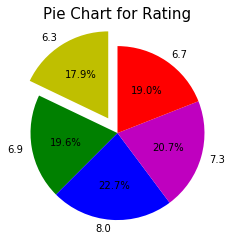

In [38]:
#Create a pie chart for the classification of ratings in 2018 dataset
#import header for pie chart creation
from matplotlib import pyplot as plt
#plot the pie graph and label each quadrant and explode the quadrant with least percentage
plt.pie(rating,labels=['6.3','6.9','8.0','7.3','6.7'],colors=('y','g','b','m','r'),autopct='%1.1f%%',explode=(0.2,0,0,0,0),startangle=90)
#Give a title for the pie chart
plt.title('Pie Chart for Rating',size=15)
#Display the pie chart
plt.show()


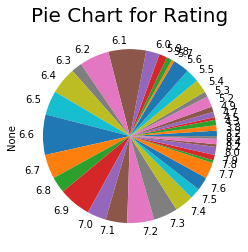

In [39]:
from matplotlib import pyplot as plt
#grouping the similar valued rows into one
df.groupby(['Rating']).size().plot.pie()
#adding the title and displaying it
plt.title('Pie Chart for Rating',size=20)
plt.show()

Here, the pie chart shows the each value grouped into a single slice


Create a line plot for gross revenue and ratings in 2018 dataset

Text(0, 0.5, 'rating')

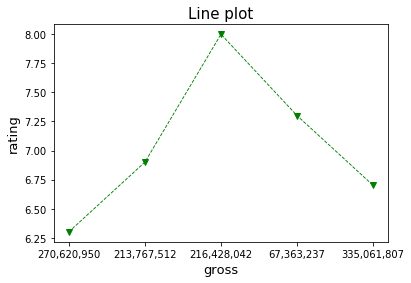

In [40]:
#plot the chart with linestyle,linewidth,color and marker
plt.plot(gross_list,rating,marker='v',linestyle='--',linewidth=0.9,color='g')
#set a title for the chart with font size
plt.title('Line plot',size=15)
#set labels for the chart with font size
plt.xlabel('gross',size=13)
plt.ylabel('rating',size=13)


Create a basic bargraph for movie names and ratings in 2018 dataset

Bar Graph for the amount of ratings per genre

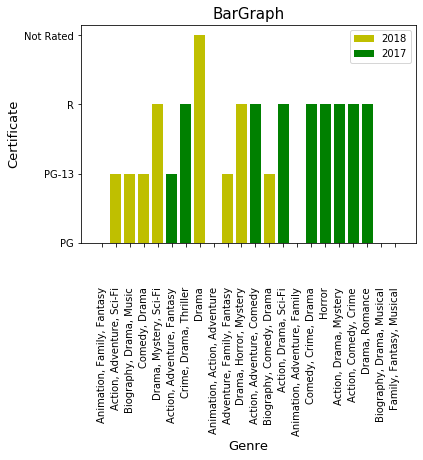

In [41]:
#width of the bars
width=0.45
#2018 data frame
certificate=df['Certificate'][:15]
genre=df['Genre'][:15]
#set color of 2018 as yellow
plt.bar(genre,certificate,color=('y'),label='2018')
#2018 labels
plt.title('BarGraph',size=15) #title
plt.xticks(rotation='vertical') #orientation
plt.xlabel('Genre',size=13) #2018 x-axis label
plt.ylabel('Certificate',size=13) #2018 y-axis label
#2017 data frame
certificate=df1['Certificate'][:15]
genre=df1['Genre'][:15]
#set color of 2017 as green
plt.bar(genre,certificate,color=('g'),label='2017')
#2017 labels
plt.title('BarGraph',size=15) #title
plt.xticks(rotation='vertical') #orientation
plt.xlabel('Genre',size=13)#2017 x-axis label
plt.ylabel('Certificate',size=13) #y-axis label
#legend location as best fit
plt.legend(loc='best')


Categorize the duration (say, longer duration, medium duration and short duration- set the thresholds on your own 

In [42]:
#based on the data to categorize the duration) and 
df['Gross($)'].dropna(0, inplace=True)
df1['Gross($)'].dropna(0, inplace=True)
print(df.head())
duration=df['Duration']
#lists for scatterplot
duration_new=[]
short_duration=[]
medium_duration=[]
long_duration=[]
length=[]
#loop to create duration_new data
for i in duration:
        #if its a string., we append it to the duration_new list., else we convert it and then append
        if type(i) == str:
            duration_new.append(i.rstrip(' mins'))
        else:
            str(i)
#categorize duration_new into short, medium and long duration
for i in duration_new:
    j=int(i)
    #if j<=90., we append the field value to the list short., else if its between 90 and 100, 
    #it goes to the the list medium_duration and 
    #if not, it goes into long_duration list
    if (j<=90):
        short_duration.append(j)
        length.append('short')
    elif(j>90 and j<100):
        medium_duration.append(j)
    else:
        long_duration.append(j)
        length.append('long')
#sample data for scatterplot
df_plot=pd.DataFrame({'short_duration':short_duration[0:13],'medium_duration':medium_duration[0:13],
                      'long_duration':long_duration[0:13],'movie':df['Movie Name'][:13],'length':length[0:13],
                     'rating':df['Rating'][:13]})
#display the first 5 rows
df_plot.head()




    Title ID               Movie Name                                   Genre  \
0  tt2709692    Dr. Seuss' The Grinch  Animation, Family, Fantasy               
1  tt3778644  Solo: A Star Wars Story   Action, Adventure, Sci-Fi               
2  tt1727824        Bohemian Rhapsody     Biography, Drama, Music               
3  tt7401588           Instant Family               Comedy, Drama               
4  tt8781414                   Freaks      Drama, Mystery, Sci-Fi               

   Rating     Gross($)       Director Certificate Duration  
0     6.3  270,620,950  Yarrow Cheney          PG   85 min  
1     6.9  213,767,512     Ron Howard       PG-13  135 min  
2     8.0  216,428,042   Bryan Singer       PG-13  134 min  
3     7.3   67,363,237    Sean Anders       PG-13  118 min  
4     6.7          NaN  Zach Lipovsky           R  105 min  


,short_duration,medium_duration,long_duration,movie,length,rating
0,85,99,135,Dr. Seuss' The Grinch,short,6.3
1,90,98,134,Solo: A Star Wars Story,long,6.9
2,90,97,118,Bohemian Rhapsody,long,8.0
3,90,96,105,Instant Family,long,7.3
4,90,91,143,Freaks,long,6.7


Regplot for the durations categorized above

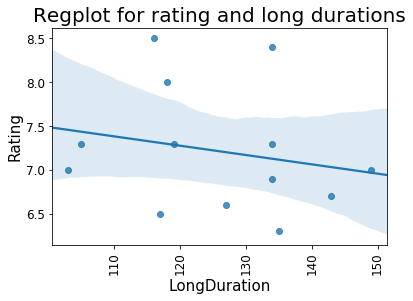

In [43]:
import seaborn as sns
sns.regplot('long_duration','rating',data=df_plot) #scatterplot
#labels
plt.title('Regplot for rating and long durations',size=20) #title
plt.xticks(rotation='vertical',size=12) #orientation
plt.yticks(size=12)
plt.xlabel('LongDuration',size=15) #x-axis label
plt.ylabel('Rating',size=15) #y-axis label
plt.show()
#labels=['short','medium','long'],colors=('y','g','b'),explode=(0,0,0.2),

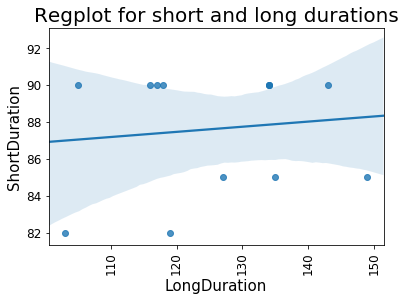

In [46]:
import seaborn as sns
sns.regplot('long_duration','short_duration',data=df_plot) #scatterplot
#labels
plt.title('Regplot for short and long durations',size=20) #title
plt.xticks(rotation='vertical',size=12) #orientation
plt.yticks(size=12)
plt.xlabel('LongDuration',size=15) #x-axis label
plt.ylabel('ShortDuration',size=15) #y-axis label
plt.show()
#labels=['short','medium','long'],colors=('y','g','b'),explode=(0,0,0.2),

check which category is mostly highly rated/people like, which one people disliked etc.

Text(29.17493055555557, 0.5, 'Duration')

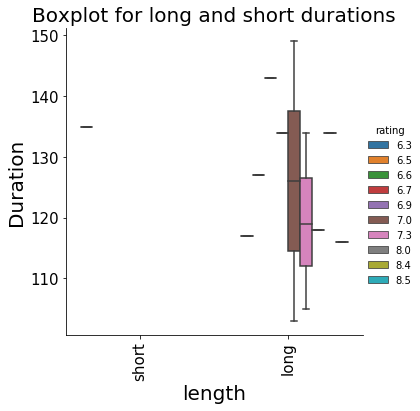

In [47]:
sns.catplot('length','long_duration',kind='box',hue='rating',data=df_plot)#data explicitly for categorical data
#labels
plt.title('Boxplot for long and short durations',size=20) #title
plt.xticks(rotation='vertical',size=15) #orientation
plt.yticks(size=15)
plt.xlabel('length',size=20) #x-axis
plt.ylabel('Duration',size=20) #y-axis


Group movies based on certificate and show the ratings

In [48]:
#print counts per certificate 
print(df['Certificate'].value_counts())
#sort by within the dataframe column certficate
df.sort_values('Certificate')


R            96
PG-13        65
PG           12
Not Rated     9
TV-MA         6
TV-PG         4
TV-14         4
None          4
Name: Certificate, dtype: int64


,Title ID,Movie Name,Genre,Rating,Gross($),Director,Certificate,Duration
136,tt7293920,The Fare,"Mystery, Romance, Thriller",5.5,NaN,D.C. Hamilton,None,82 min
186,tt7293920,The Fare,"Mystery, Romance, Thriller",5.5,NaN,D.C. Hamilton,None,82 min
100,tt8255490,Surviving Christmas with the Relatives,Comedy,4.9,NaN,James Dearden,None,101 min
150,tt8255490,Surviving Christmas with the Relatives,Comedy,4.9,NaN,James Dearden,None,101 min
88,tt6998518,Mandy,"Action, Fantasy, Horror",6.6,"1,214,525",Panos Cosmatos,Not Rated,121 min
...,...,...,...,...,...,...,...,...
159,tt7772580,The Perfection,"Drama, Horror, Thriller",6.1,NaN,Richard Shepard,TV-MA,90 min
19,tt2990140,The Christmas Chronicles,"Adventure, Comedy, Family",7.1,NaN,Clay Kaytis,TV-PG,104 min
154,tt8709036,A Christmas Prince: The Royal Wedding,"Drama, Romance",5.2,NaN,John Schultz,TV-PG,92 min
104,tt8709036,A Christmas Prince: The Royal Wedding,"Drama, Romance",5.2,NaN,John Schultz,TV-PG,92 min


In [49]:
cert=[]
#all movies
cert_list=df['Certificate']
#loop cert_list to sort R & PG-13 movies
for i in cert_list:
    if i=='R' or i=='PG-13':
        #add to cert list
        cert.append(i)
#count cert list
print(len(cert))
#data frame
df_cert=pd.DataFrame({'Certificate':cert,'Duration':df['Duration'][:161],'rating':df['Rating'][:161]})   
#display the first 5 rows
df_cert.head()

161


,Certificate,Duration,rating
0,PG-13,85 min,6.3
1,PG-13,135 min,6.9
2,PG-13,134 min,8.0
3,R,118 min,7.3
4,PG-13,105 min,6.7


In [50]:
#print count of rate R & PG-13 movies
df_cert['Certificate'].value_counts()

R        96
PG-13    65
Name: Certificate, dtype: int64

Comparison between Certificate and Duration - Swarm Plot

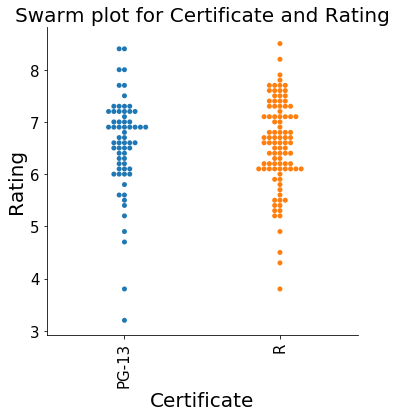

In [51]:
sns.catplot('Certificate','rating',kind='swarm',data=df_cert)#data explicitly for categorical data
#labels
plt.title('Swarm plot for Certificate and Rating',size=20) #title
plt.xticks(rotation='vertical',size=15) #orientation
plt.yticks(size=15)
plt.ylabel('Rating',size=20) #y-axis label
plt.xlabel('Certificate',size=20) #x-axis label
plt.show() #print

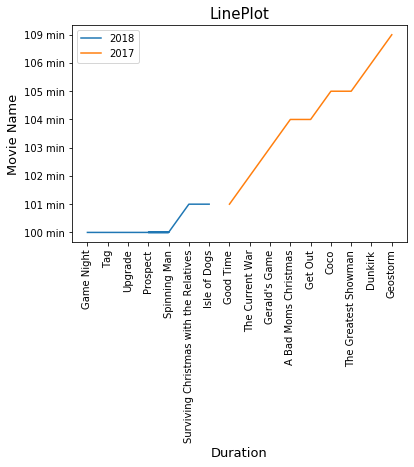

In [52]:
#2018 line plot
df_new=df
df_new.sort_values(by='Duration', ascending=True, axis=0, inplace=True)
#2017 line plot
df1_new=df1
df1_new.sort_values(by='Duration', ascending=True, axis=0, inplace=True)
#2018 x & y-axis
plt.plot(df_new['Movie Name'][:10],df['Duration'][:10],label='2018')
#2017 x & y-axis
plt.plot(df1_new['Movie Name'][:10],df1['Duration'][:10],label='2017')
#labels
plt.title('LinePlot',size=15) #title
plt.xticks(rotation=90) #orientation
plt.yticks()
plt.xlabel('Duration',size=13) #x-axis label
plt.ylabel('Movie Name',size=13) #y-axis label
plt.legend(loc='best') #legend location at best fit 
plt.show() #print


In [53]:
import pandas as pd 
#using bins to categorize the ratings; below 6 into one category and above 6 into one category
bins = [1,6,9]

#taking ratings column into a separate frame
ratings = df['Rating']

#giving the bin names categorized into high and low
bin_names = ['low','high']
#dividing the categories
cats = pd.cut(ratings,bins, labels=bin_names)
#cats
#checking the counts for above categorized values
levelcount = pd.value_counts(cats)
print(levelcount)

#Adding the new category into data frame; nameing it as 'Ratingslevel'
ratings1 = pd.DataFrame(cats)
#ratings1

df['Ratingslevel'] = ratings1
#print(df)
#displaying the first five rows
df.head()

high    156
low      44
Name: Rating, dtype: int64


,Title ID,Movie Name,Genre,Rating,Gross($),Director,Certificate,Duration,Ratingslevel
43,tt2704998,Game Night,"Action, Comedy, Crime",6.9,"69,179,066",John Francis Daley,R,100 min,high
106,tt2854926,Tag,Comedy,6.5,"54,547,470",Jeff Tomsic,R,100 min,high
156,tt2854926,Tag,Comedy,6.5,"54,547,470",Jeff Tomsic,R,100 min,high
45,tt6499752,Upgrade,"Action, Horror, Sci-Fi",7.5,"11,871,365",Leigh Whannell,R,100 min,high
185,tt7946422,Prospect,"Drama, Sci-Fi, Thriller",6.2,NaN,Christopher Caldwell,R,100 min,high


43     69179066.0
106    54547470.0
156    54547470.0
45     11871365.0
185           NaN
Name: Gross($), dtype: float64


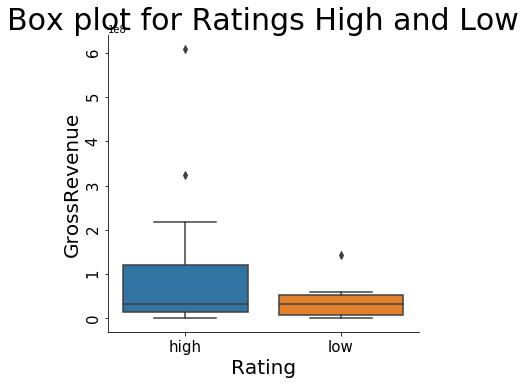

In [54]:
#replacing the ',' with spaces ''
df['Gross($)']=df['Gross($)'].str.replace(',', '')
#converted the string types to numeric for all the values in gross field
df['Gross($)']=pd.to_numeric(df['Gross($)'])
print(df['Gross($)'].head())
#boxplot
sns.catplot('Ratingslevel','Gross($)',kind='box', data=df[50:100])
#labels
plt.yticks(rotation='vertical',size=15) #orientation
plt.xticks(size=15)
plt.xlabel('Rating',size=20) #x-axis label
plt.ylabel('GrossRevenue',size=20) #y-axis label
plt.title('Box plot for Ratings High and Low',size=30) #title
plt.show() #print

Now, lets check if rating, duration has any effect on gross revenue.


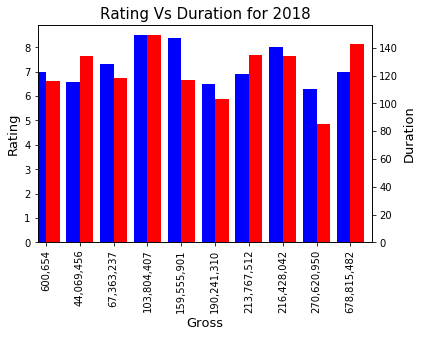

In [55]:
#import the neccessary packages and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO(""" rating duration gross gross1
270,620,950   6.3   85    270620950  
213,767,512   6.9   135   213767512
216,428,042   8     134   216428042
67,363,237    7.3   118   67363237
678,815,482   7     143   678815482
103,804,407   8.5   149   103804407
600,654       7     116   600654   
190,241,310   6.5   103   190241310
159,555,901   8.4   117   159555901 
44,069,456    6.6   134   44069456 

""")

#reading the data assigned to s
df4 = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)
#sorting the values in ascending order
df4.sort_values(by='gross' ,ascending=True, axis=0, inplace=True)

#Create matplotlib figure
fig = plt.figure() 

#Create matplotlib axes
ax = fig.add_subplot(111)
#Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

#specify width of each bar on the graph
width = 0.4

#set rating as blue
df4.rating.plot(kind='bar', color='b', ax=ax, width=width, position=1)
#set rating as red
df4.duration.plot(kind='bar', color='r', ax=ax2, width=width, position=0)
#labels
plt.title('Rating Vs Duration for 2018',size=15) #title
ax.set_ylabel('Rating',size=13) #y-axis label for raing
ax2.set_ylabel('Duration',size=13) #y-axis label for duration
ax.set_xlabel('Gross',size=13) #x-axis label
plt.show() #print




Text(0, 0.5, 'Duration')

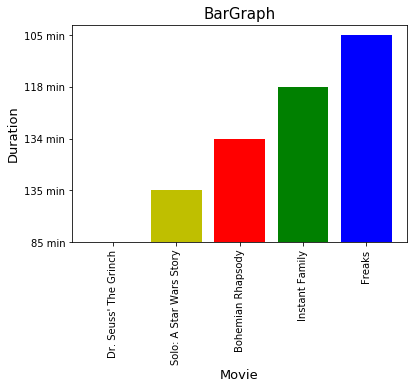

In [56]:
#plot the bars with color
df.sort_values(by='Duration', ascending=True, axis=0, inplace=True)
plt.bar(movie,duration[0:5],color=('m','y','r','g','b'))
#set the title for the bar graph
plt.title('BarGraph',size=15)
#set the labels with fontsize and display the x-axis labels vertically
plt.xticks(rotation='vertical')
plt.xlabel('Movie',size=13)
plt.ylabel('Duration',size=13)


In [57]:
import pandas as pd
#reading the top rated movies csv into a dataframe
dfi=pd.read_csv('imdbtop250_Ravali_Deepthi_karen_dataset.csv')
#print datasheet
dfi

,Title,Year,Rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9
...,...,...,...
245,Guardians of the Galaxy,2014,8.0
246,Infernal Affairs,2002,8.0
247,The Battle of Algiers,1966,8.0
248,Castle in the Sky,1986,8.0


Text(0.5, 1.0, 'Box Plots for TopRated movies')

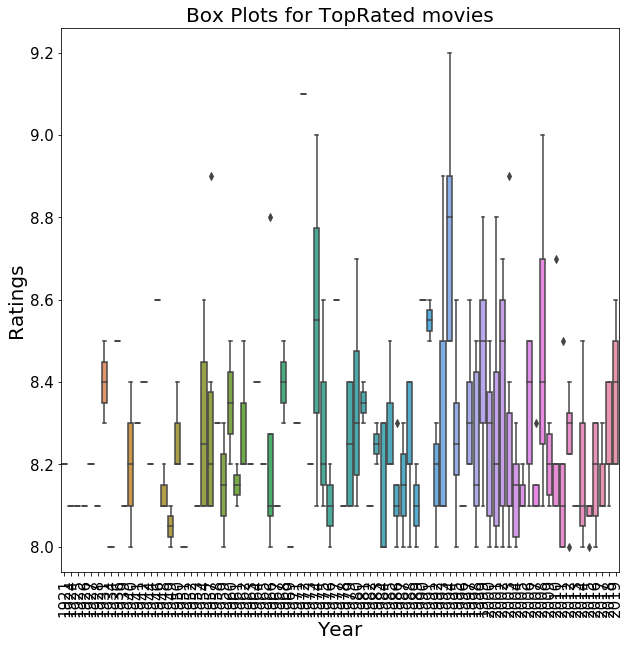

In [58]:
plt.subplots(figsize=(10,10))
#boxplot
sns.boxplot(x='Year', y='Rating', data=dfi)
#labels
plt.xlabel('Year',size=20) #x-axis label
plt.ylabel('Ratings',size=20) #y-axis label
plt.xticks(rotation=90,size=15) #orientation
plt.yticks(size=15)
plt.title('Box Plots for TopRated movies',size=20) #title


Categorize the genre and do some statistics and see if you can say something meaningful from there.

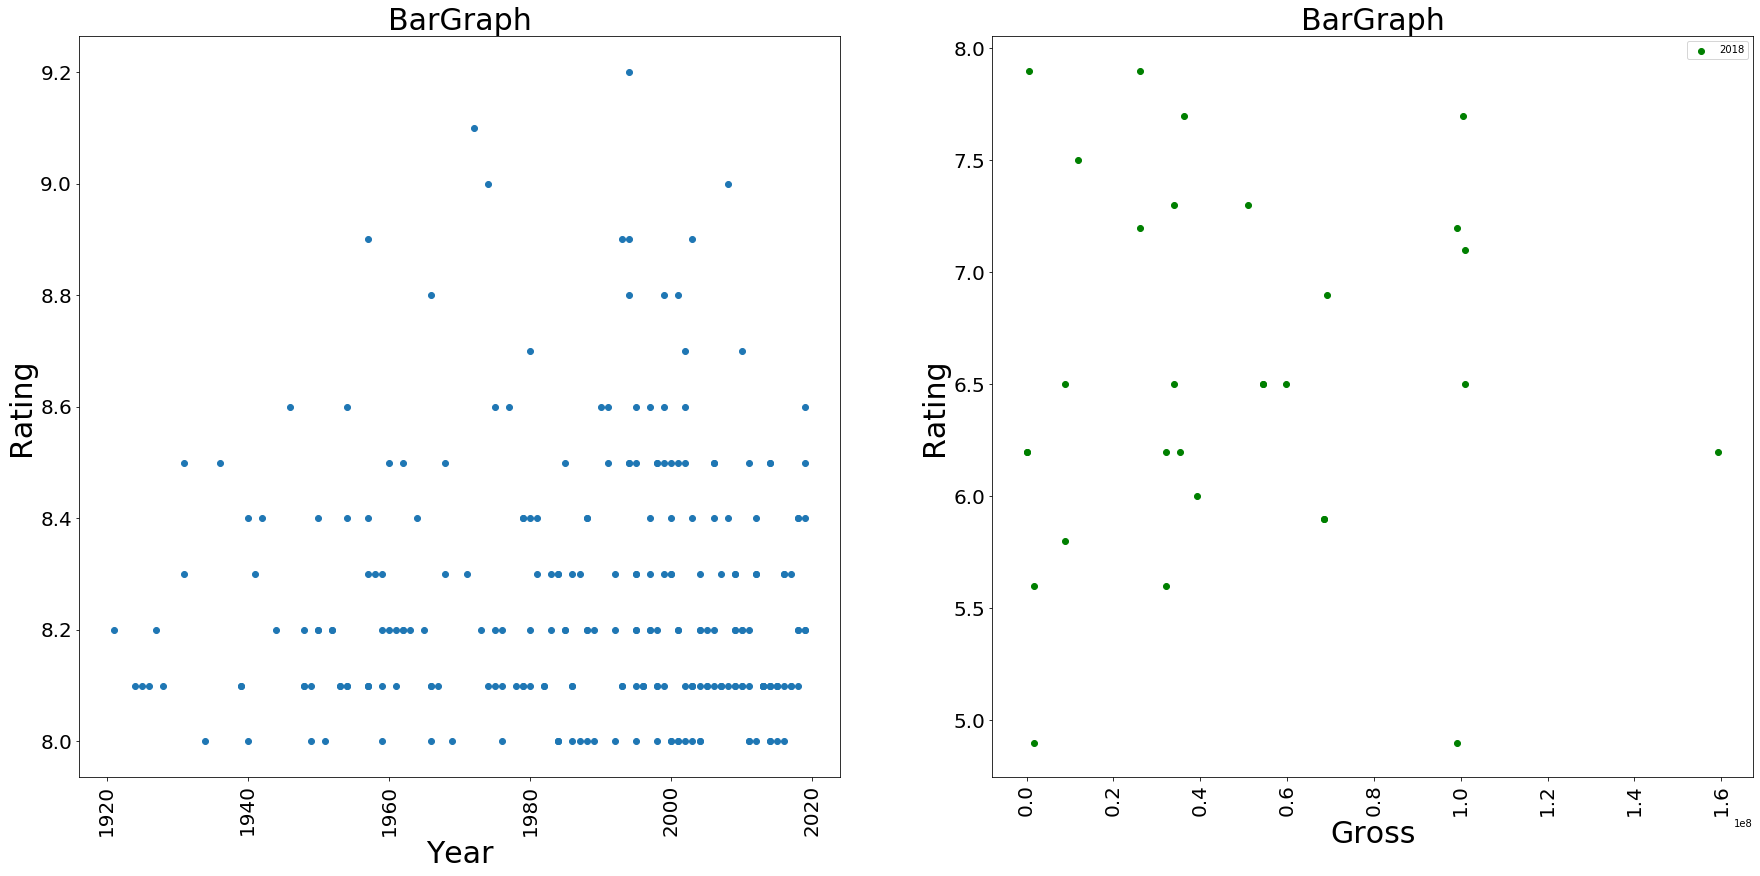

In [59]:
df['Gross($)'].dropna(0, inplace=True)
#dimensions
fig=plt.figure(figsize=(30,30))
#scatterplot for year vs rating
plt.subplot(2,2,1)
#taking each columns.. Rating, Year and Title into a separate frames
ratings1=dfi['Rating']
year1=dfi['Year']
title1=dfi['Title']
plt.scatter(year1,ratings1,label='year')
#labels
plt.title('BarGraph',size=30) #title
plt.xticks(rotation='vertical',size=20) #orientation
plt.yticks(size=20)
plt.xlabel('Year',size=30) #x-axis
plt.ylabel('Rating',size=30) #y-axis
#scatterplot for gross vs rating
plt.subplot(2,2,2)
ratings2=df['Rating'][:30]
title2=df['Gross($)'][:30]
#labels
plt.scatter(title2,ratings2,color=('g'),label='2018') #color green
plt.title('BarGraph',size=30) #title
plt.xticks(rotation='vertical',size=20) #orientation
plt.yticks(size=20)
plt.xlabel('Gross',size=30) #x-axis title
plt.ylabel('Rating',size=30) #y-axis title
plt.legend(loc='best') #legend location at best fit


Categorizing the genre and making a bargraph 

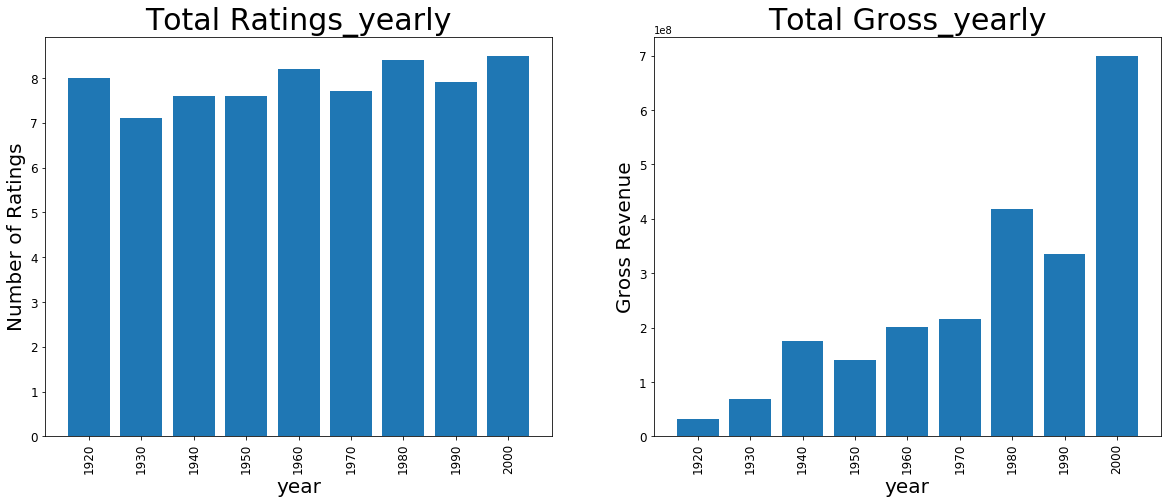

In [60]:
#Barplot
fig=plt.figure(figsize=(20,25))

#create an empty list Year
Year=[]
#taking the Year column into a separate frame
Yr=dfi['Year']
#creating empty lists A,B,C,D,E,F to append the categories respectively
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
#loop to categorize Year list by decade
for i in Yr:
    if i in range(1920,1930):
        j=1920
        Year.append(str(j))
    elif i in range(1930,1940):
        j=1930
        Year.append(str(j))
    elif i in range(1940,1950):
        j=1940
        Year.append(str(j))
    elif i in range(1950,1960):
        j=1950
        Year.append(str(j))
    elif i in range(1960,1970):
        j=1960
        Year.append(str(j))
    elif i in range(1970,1980):
        j=1970
        Year.append(str(j))
    elif i in range(1980,1990):
        j=1980
        Year.append(str(j))
    elif i in range(1990,2000):
        j=1990
        Year.append(str(j))
    elif i in range(2000,2020):
        j=2000
        Year.append(str(j))
    else:
        Year.append(str(j))
#create a dataframe and loading the columns Year, Duration and rating into the df_year dataframe
df_year=pd.DataFrame({'Year':Year[0:200],'Duration':df['Duration'],'rating':df['Rating']})  
df_year.sort_values(by='Year' ,ascending=True, axis=0, inplace=True)
df_year.head()
#graph1: Total Ratings, Yearly
plt.subplot(3,2,1)
plt.bar(df_year['Year'],df_year['rating'], align='center')
#labels
plt.title('Total Ratings_yearly',size=30) #title
plt.ylabel('Number of Ratings',size=20) #y-axis
plt.xlabel('year',size=20) #x-axis
plt.yticks(size=12)
plt.xticks(rotation='vertical',size=12) #orientation
#graph2 - Total Gross, Yearly. The values inside specify the positions i.e, rows and column positions
plt.subplot(3,2,2)
#create a dataframe and loading the columns Year, Duration and gross into the df_year1 dataframe
df_year1=pd.DataFrame({'Year':Year[0:200],'Duration':df['Duration'],'gross':df['Gross($)']})                      
df_year1.sort_values(by='Year' ,ascending=True, axis=0, inplace=True)
plt.bar(df_year1['Year'],df_year1['gross'], align='center')
#labels
plt.title('Total Gross_yearly',size=30) #title
plt.ylabel('Gross Revenue',size=20) #y-axis
plt.xlabel('year',size=20) #x-axis
plt.yticks(size=12)
plt.xticks(rotation='vertical',size=12)#orientation
#graph3 - Gross Revenue. 
df['Gross($)'].dropna(0, inplace=True)
#The values inside the brackets specify the positions i.e, rows and column positions


Thus On analyzing all our objectives we conclude that whenever people rate the movies with their opinion, the gross increases. Currently the year range 2000-2020 has the highest gross revenues since people actively rated movies

Text(0.5, 1, 'Box Plots for TopRated movies')

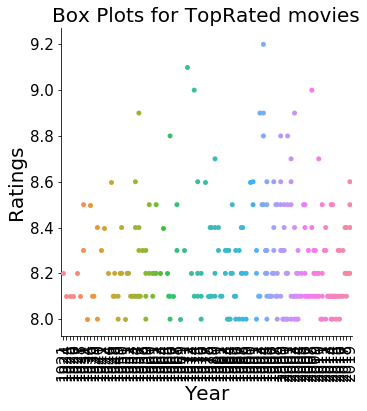

In [63]:
#Swarm plot for all 250 years
sns.catplot(x='Year', y='Rating', kind='swarm',data=dfi)
#labels
plt.xlabel('Year',size=20) #x-axis label
plt.ylabel('Ratings',size=20) #y-axis label
plt.xticks(rotation=90,size=15) #orientation
plt.yticks(size=15)
plt.title('Swarm Plots for TopRated movies',size=20) #title
